In [1]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import HashingVectorizer

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./dataset/clean_sql_dataset.csv')

In [64]:
df.head(50)

,payload,label,type
0,""" or pg_sleep ( __TIME__ ) --",1,SQL Injection
1,create user name identified by pass123 tempora...,1,SQL Injection
2,AND 1 = utl_inaddr.get_host_address ( ...,1,SQL Injection
3,select * from users where id = '1' or @ @1 ...,1,SQL Injection
4,"select * from users where id = 1 or 1#"" ( ...",1,SQL Injection
5,select name from syscolumns where id = ...,1,SQL Injection
6,select * from users where id = 1 +$+ or 1 =...,1,SQL Injection
7,"1; ( load_file ( char ( 47,101,116,99,47...",1,SQL Injection
8,select * from users where id = '1' or ||/1 ...,1,SQL Injection
9,select * from users where id = '1' or \.<\ ...,1,SQL Injection


In [3]:
df.rename(columns={'Query': 'payload', 'Label': 'label'}, inplace=True)
df['type'] = np.where(df['label'] == 1, "SQL Injection", "Normal")

In [4]:
X = df['payload']
y = df['label']

In [5]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [6]:
X_processed = [preprocess_text(payload) for payload in X]
vectorizer = HashingVectorizer(
    analyzer='char',
    ngram_range=(3, 5),
    n_features=2**20,
    dtype=np.float32
)
X_features = vectorizer.transform(X_processed)
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, random_state=42)

In [7]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
y_pred = random_forest_model.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred)
scores_random_forest = cross_val_score(decision_tree_model, X_features, y, cv=5, scoring='f1')

print("F1 scores:", scores_random_forest)
print("Mean F1 score:", scores_random_forest.mean())
print("Accuracy Score:", accuracy_random_forest)

F1 scores: [0.95441993 0.97545877 0.96694432 0.98353289 0.97584111]
Mean F1 score: 0.9712394013583916
Accuracy Score: 0.9807407074475257


In [30]:
y_pred_tree = decision_tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred)
scores_tree = cross_val_score(decision_tree_model, X_features, y, cv=5, scoring='f1')

print("Decision Tree Classifier F1 scores:", scores_tree)
print("Decision Tree Classifier Mean F1 score:", scores_tree.mean())
print("Decision Tree Classifier Accuracy Score:", accuracy_tree)

Decision Tree Classifier F1 scores: [0.95798162 0.97479734 0.96703585 0.98294086 0.97569522]
Decision Tree Classifier Mean F1 score: 0.9716901764346838
Decision Tree Classifier Accuracy Score: 0.9807407074475257


[Text(0.3278846908349027, 0.9995755517826825, 'x[355395] <= -0.0\ngini = 0.499\nsamples = 103828\nvalue = [49458.0, 54370.0]'),
 Text(0.09573132454488387, 0.9987266553480475, 'x[296046] <= -0.074\ngini = 0.149\nsamples = 35886\nvalue = [2904, 32982]'),
 Text(0.21180800768989327, 0.9991511035653651, 'True  '),
 Text(0.040175768989328314, 0.9978777589134126, 'x[507023] <= 0.012\ngini = 0.451\nsamples = 3301\nvalue = [2168, 1133]'),
 Text(0.025109855618330193, 0.9970288624787776, 'x[137472] <= -0.008\ngini = 0.352\nsamples = 2805\nvalue = [2165, 640]'),
 Text(0.010043942247332079, 0.9961799660441426, 'x[225252] <= -0.06\ngini = 0.019\nsamples = 318\nvalue = [3, 315]'),
 Text(0.005021971123666039, 0.9953310696095077, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.015065913370998116, 0.9953310696095077, 'x[193218] <= -0.01\ngini = 0.006\nsamples = 316\nvalue = [1, 315]'),
 Text(0.010043942247332079, 0.9944821731748726, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.020087884494664

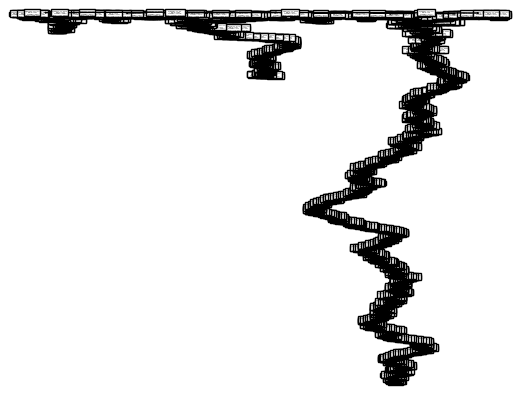

In [33]:
tree.plot_tree(decision_tree_model)

In [56]:
sql_injection_payloads = [
    "sleep(5)#",
    "1 or sleep(5)#",
    '" or sleep(5)#',
    "' or sleep(5)#",
    '" or sleep(5)="',
    "' or sleep(5)='",
    "1) or sleep(5)#",
    ") or sleep(5)=\"",
    "') or sleep(5)='",
    "1)) or sleep(5)#",
    ")) or sleep(5)=\"",
    "')) or sleep(5)='",
    ";waitfor delay '0:0:5'--",
    ");waitfor delay '0:0:5'--",
    ";'waitfor delay '0:0:5'--",
    '";waitfor delay \'0:0:5\'--',
    "');waitfor delay '0:0:5'--",
    "\");waitfor delay '0:0:5'--",
    "));waitfor delay '0:0:5'--",
    "'));waitfor delay '0:0:5'--",
    "\"));waitfor delay '0:0:5'--",
    "benchmark(10000000,MD5(1))#",
    "1 or benchmark(10000000,MD5(1))#",
    '" or benchmark(10000000,MD5(1))#',
    "' or benchmark(10000000,MD5(1))#",
    "1) or benchmark(10000000,MD5(1))#",
    ") or benchmark(10000000,MD5(1))#",
    "') or benchmark(10000000,MD5(1))#",
    "1)) or benchmark(10000000,MD5(1))#",
    ")) or benchmark(10000000,MD5(1))#",
    "')) or benchmark(10000000,MD5(1))#",
    "pg_sleep(5)--",
    "1 or pg_sleep(5)--",
    '" or pg_sleep(5)--',
    "' or pg_sleep(5)--",
    "1) or pg_sleep(5)--",
    ") or pg_sleep(5)--",
    "') or pg_sleep(5)--",
    "1)) or pg_sleep(5)--",
    ")) or pg_sleep(5)--",
    "')) or pg_sleep(5)--",
    "AND (SELECT * FROM (SELECT(SLEEP(5)))bAKL) AND 'vRxe'='vRxe",
    "AND (SELECT * FROM (SELECT(SLEEP(5)))YjoC) AND '%'='",
    "AND (SELECT * FROM (SELECT(SLEEP(5)))nQIP)",
    "AND (SELECT * FROM (SELECT(SLEEP(5)))nQIP)--",
    "AND (SELECT * FROM (SELECT(SLEEP(5)))nQIP)#",
    "SLEEP(5)#",
    "SLEEP(5)--",
    "SLEEP(5)=\"",
    "SLEEP(5)='",
    "or SLEEP(5)",
    "or SLEEP(5)#",
    "or SLEEP(5)--",
    "or SLEEP(5)=\"",
    "or SLEEP(5)='",
    "waitfor delay '00:00:05'",
    "waitfor delay '00:00:05'--",
    "waitfor delay '00:00:05'#",
    "benchmark(50000000,MD5(1))",
    "benchmark(50000000,MD5(1))--",
    "benchmark(50000000,MD5(1))#",
    "or benchmark(50000000,MD5(1))",
    "or benchmark(50000000,MD5(1))--",
    "or benchmark(50000000,MD5(1))#",
    "pg_SLEEP(5)",
    "pg_SLEEP(5)--",
    "pg_SLEEP(5)#",
    "or pg_SLEEP(5)",
    "or pg_SLEEP(5)--",
    "or pg_SLEEP(5)#",
    "'\"",
    "AnD SLEEP(5)",
    "AnD SLEEP(5)--",
    "AnD SLEEP(5)#",
    "&&SLEEP(5)",
    "&&SLEEP(5)--",
    "&&SLEEP(5)#",
    "' AnD SLEEP(5) ANd '1",
    "'&&SLEEP(5)&&'1",
    "ORDER BY SLEEP(5)",
    "ORDER BY SLEEP(5)--",
    "ORDER BY SLEEP(5)#",
    "sleep(5)#",
    "1 or sleep(5)#",
    '" or sleep(5)#',
    "' or sleep(5)#",
    '" or sleep(5)="',
    "' or sleep(5)='",
    "1) or sleep(5)#",
    ") or sleep(5)=\"",
    "') or sleep(5)='",
    "1)) or sleep(5)#",
    ")) or sleep(5)=\"",
    "')) or sleep(5)='",
    ";waitfor delay '0:0:5'--",
    ");waitfor delay '0:0:5'--",
    ";'waitfor delay '0:0:5'--",
    '";waitfor delay \'0:0:5\'--',
    "');waitfor delay '0:0:5'--",
    "\");waitfor delay '0:0:5'--",
    "));waitfor delay '0:0:5'--",
    "'));waitfor delay '0:0:5'--",
    "\"));waitfor delay '0:0:5'--",
    "benchmark(10000000,MD5(1))#",
    "1 or benchmark(10000000,MD5(1))#",
    '" or benchmark(10000000,MD5(1))#',
    "' or benchmark(10000000,MD5(1))#",
    "1) or benchmark(10000000,MD5(1))#",
    ") or benchmark(10000000,MD5(1))#",
    "') or benchmark(10000000,MD5(1))#",
    "1)) or benchmark(10000000,MD5(1))#",
    ")) or benchmark(10000000,MD5(1))#",
    "')) or benchmark(10000000,MD5(1))#",
    "pg_sleep(5)--",
    "1 or pg_sleep(5)--",
    '" or pg_sleep(5)--',
    "' or pg_sleep(5)--",
    "1) or pg_sleep(5)--",
    ") or pg_sleep(5)--",
    "') or pg_sleep(5)--",
    "1)) or pg_sleep(5)--",
    ")) or pg_sleep(5)--",
    "')) or pg_sleep(5)--",
    "AND (SELECT * FROM (SELECT(SLEEP(5)))bAKL) AND 'vRxe'='vRxe",
    "AND (SELECT * FROM (SELECT(SLEEP(5)))YjoC) AND '%'='",
    "AND (SELECT * FROM (SELECT(SLEEP(5)))nQIP)",
    "AND (SELECT * FROM (SELECT(SLEEP(5)))nQIP)--",
    "AND (SELECT * FROM (SELECT(SLEEP(5)))nQIP)#",
    "SLEEP(5)#",
    "SLEEP(5)--",
    "SLEEP(5)=\"",
    "SLEEP(5)='",
    "or SLEEP(5)",
    "or SLEEP(5)#",
    "or SLEEP(5)--",
    "or SLEEP(5)=\"",
    "or SLEEP(5)='",
    "waitfor delay '00:00:05'",
    "waitfor delay '00:00:05'--",
    "waitfor delay '00:00:05'#",
    "sleep(5)#",
    "1 or sleep(5)#",
    '" or sleep(5)#',
    "' or sleep(5)#",
    '" or sleep(5)="',
    "' or sleep(5)='",
    "1) or sleep(5)#",
    ") or sleep(5)=\"",
    "') or sleep(5)='",
    "1)) or sleep(5)#",
    ")) or sleep(5)=\"",
    "')) or sleep(5)='",
    ";waitfor delay '0:0:5'--",
    ");waitfor delay '0:0:5'--",
    ";'waitfor delay '0:0:5'--",
    '";waitfor delay \'0:0:5\'--',
    "');waitfor delay '0:0:5'--",
    "\");waitfor delay '0:0:5'--",
    "));waitfor delay '0:0:5'--",
    "'));waitfor delay '0:0:5'--",
    "\"));waitfor delay '0:0:5'--",
    "benchmark(10000000,MD5(1))#",
    "1 or benchmark(10000000,MD5(1))#",
    '" or benchmark(10000000,MD5(1))#',
    "' or benchmark(10000000,MD5(1))#",
    "1) or benchmark(10000000,MD5(1))#",
    ") or benchmark(10000000,MD5(1))#",
    "') or benchmark(10000000,MD5(1))#",
    "1)) or benchmark(10000000,MD5(1))#",
    ")) or benchmark(10000000,MD5(1))#",
    "')) or benchmark(10000000,MD5(1))#",
    "pg_sleep(5)--",
    "1 or pg_sleep(5)--",
    '" or pg_sleep(5)--',
    "' or pg_sleep(5)--",
    "1) or pg_sleep(5)--",
    ") or pg_sleep(5)--",
    "') or pg_sleep(5)--",
    "1)) or pg_sleep(5)--",
    ")) or pg_sleep(5)--",
    "')) or pg_sleep(5)--",
    "AND (SELECT * FROM (SELECT(SLEEP(5)))bAKL) AND 'vRxe'='vRxe",
    "AND (SELECT * FROM (SELECT(SLEEP(5)))YjoC) AND '%'='",
    "AND (SELECT * FROM (SELECT(SLEEP(5)))nQIP)",
    "AND (SELECT * FROM (SELECT(SLEEP(5)))nQIP)--",
    "AND (SELECT * FROM (SELECT(SLEEP(5)))nQIP)#",
    "SLEEP(5)#",
    "SLEEP(5)--",
    "SLEEP(5)=\"",
    "SLEEP(5)='",
    "or SLEEP(5)",
    "or SLEEP(5)#",
    "or SLEEP(5)--",
    "or SLEEP(5)=\"",
    "or SLEEP(5)='",
    "waitfor delay '00:00:05'",
    "waitfor delay '00:00:05'--",
    "waitfor delay '00:00:05'#",
    "benchmark(50000000,MD5(1))",
    "benchmark(50000000,MD5(1))--",
    "benchmark(50000000,MD5(1))#",
    "or benchmark(50000000,MD5(1))",
    "or benchmark(50000000,MD5(1))--",
    "or benchmark(50000000,MD5(1))#",
    "pg_SLEEP(5)",
    "pg_SLEEP(5)--",
    "pg_SLEEP(5)#",
    "or pg_SLEEP(5)",
    "or pg_SLEEP(5)--",
    "or pg_SLEEP(5)#",
    "'\"",
    "AnD SLEEP(5)",
    "AnD SLEEP(5)--",
    "AnD SLEEP(5)#",
    "&&SLEEP(5)",
    "&&SLEEP(5)--",
    "&&SLEEP(5)#",
    "' AnD SLEEP(5) ANd '1",
    "'&&SLEEP(5)&&'1",
    "ORDER BY SLEEP(5)",
    "ORDER BY SLEEP(5)--",
    "ORDER BY SLEEP(5)#",
    "UNION ALL SELECT 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27--"
]

In [57]:
for new_request in sql_injection_payloads:
    new_request_processed = preprocess_text(new_request)
    prediction = random_forest_model.predict(vectorizer.transform([new_request_processed]))
    print("Block Request" if prediction == 1 else "Allow Request")

Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Allow Request
Allow Request
Allow Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block Request
Block 

In [60]:
normal_requests = [
    "GET / HTTP/1.1",
    "GET /index.html HTTP/1.1",
    "POST /login HTTP/1.1",
    "GET /about-us HTTP/1.1",
    "GET /contact-us HTTP/1.1",
    "GET /products HTTP/1.1",
    "POST /register HTTP/1.1",
    "GET /faqs HTTP/1.1",
    "GET /support HTTP/1.1",
    "GET /terms-of-service HTTP/1.1",
    "GET /privacy-policy HTTP/1.1",
    "GET /sitemap.xml HTTP/1.1",
    "GET /robots.txt HTTP/1.1",
    "POST /search HTTP/1.1",
    "GET /category/electronics HTTP/1.1",
    "GET /category/clothing HTTP/1.1",
    "GET /product/123 HTTP/1.1",
    "POST /cart/add HTTP/1.1",
    "GET /cart/view HTTP/1.1",
    "GET /checkout HTTP/1.1",
    "POST /payment/process HTTP/1.1",
    "GET /?page=1 HTTP/1.1",
    "GET /?category=electronics&sort=price HTTP/1.1",
    "GET /?search=apple&sort=relevance HTTP/1.1",
    "GET /?id=123&name=john HTTP/1.1",
    "GET /?year=2022&month=12 HTTP/1.1",
    "GET /?limit=10&offset=20 HTTP/1.1",
    "GET /?filter=price&order=asc HTTP/1.1",
    "GET /?lang=en&country=us HTTP/1.1",
    "GET /?user=john&password=hello HTTP/1.1",
    "GET /?token=1234567890 HTTP/1.1",
    "GET /?redirect=/home HTTP/1.1",
    "GET /?status=success HTTP/1.1",
    "GET /?error=404 HTTP/1.1",
    "GET /?message=hello+world HTTP/1.1",
    "GET /?format=json HTTP/1.1",
    "GET /?callback=myFunction HTTP/1.1",
    "GET /?q=hello+world HTTP/1.1",
    "GET /?query=select+*+from+users HTTP/1.1",
    "GET /?sort=name&order=desc HTTP/1.1",
    "GET /?filter=category&value=electronics HTTP/1.1",
    "GET /?search=apple&sort=price&order=asc HTTP/1.1",
    "GET /?lang=en&country=us&currency=usd HTTP/1.1",
    "GET /?user=john&password=hello&token=1234567890 HTTP/1.1"
]

In [61]:
for new_request in normal_requests:
    new_request_processed = preprocess_text(new_request)
    prediction = random_forest_model.predict(vectorizer.transform([new_request_processed]))
    print("Block Request" if prediction == 1 else "Allow Request")

Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Block Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Allow Request
Block Request
